<h1>Logistic Function Fit </h1>

<h2> Basic instruction for a model with `scipy.optimize` </h2>


source : https://ipython-books.github.io/93-fitting-a-function-to-data-with-nonlinear-least-squares/

<h3> dependencies </h3>

In [4]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

<h3> Define a logistic function with four parametersj </h3>


In [12]:
#a: capacity
#b: constant
#-c to exponent
def f(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

\begin{equation}% 
f _{a,b,c,d} (x) =\frac{a}{1+ e ^{-c (x-d)} }  +b %
\end{equation}

<h3> Define four random parameters </h3>

In [13]:
a, c = np.random.exponential(size=2)
b, d = np.random.randn(2)

<h3> Generate random data points with <bold>sigmoid function </bold> adding noise</h3>

In [14]:
n=100
x = np.linspace(-10,10,n)
y_model = f(x,a,b,c,d)

y = y_model + a * .2 * np.random.randn(n)

<h3> plot data points </h3>

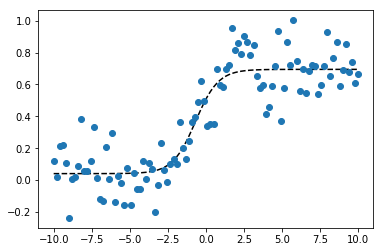

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(x, y_model, '--k')
ax.plot(x, y, 'o')

<h3> Simulating a fit  using opt.curve_fit(f, x y) </h3>


In [16]:
(a_, b_, c_, d_), _ = opt.curve_fit(f, x, y)

<h3> graph the predict curve </h3>

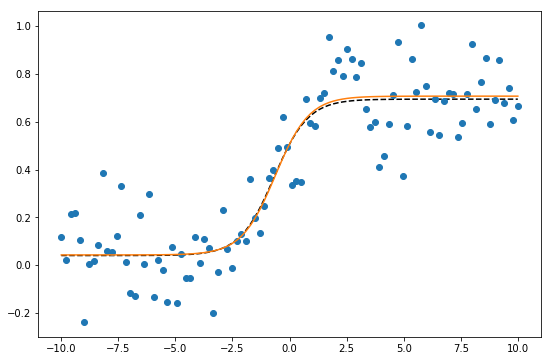

In [19]:
y_fit =f(x , a_, b_, c_, d_)

fig, ax = plt.subplots(1,1, figsize=(9,6))
ax.plot(x, y_model, '--k') #k is black
ax.plot(x, y, 'o')
ax.plot(x, y_fit, '-')


<h2> Test case </h2>

In [31]:
import pandas as pd
by= pd.read_csv("BelarusWB.csv")


In [35]:
by['years_since_1990']= by['year']-1990

In [37]:
by = by[by['year']>=1990]

In [38]:
by['prop_users']=by['internet.users']/by['population']

/home/dan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
by.columns

Index(['Country', 'Country.Code', 'year', 'Region', 'IncomeGroup',
       'population', 'rural.population', 'hiv.cases', 'san.access',
       'motor.vehicles', 'gas.price', 'co2.emission', 'mobile.users',
       'internet.users', 'years_since_1990', 'prop_users'],
      dtype='object')

In [74]:
x = list(by['years_since_1990'])
y = by['prop_users']

In [75]:
def replaceNaN (lst):
    import numpy
    ar = numpy.array(lst)
    s=numpy.isnan(lst)
    ar[s]=0.0
    return list(ar)

y=replaceNaN(y)
y = list(y)

22

a(capacity): 0.41
b(fixed)   : 0.0048


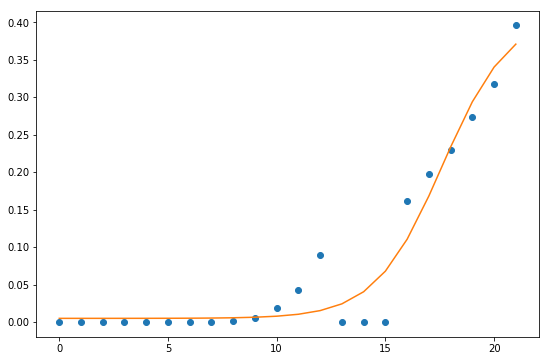

In [94]:
(a_, b_, c_, d_), _ = opt.curve_fit(f, x, y)
y_fit =f(x , a_, b_, c_, d_)

print("a(capacity): {:.2f}".format(a_))
print("b(fixed)   : {:.4f}".format(b_))

fig, ax = plt.subplots(1,1, figsize=(9,6))

ax.plot(x, y, 'o')
ax.plot(x, y_fit, '-')
